In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Introduction to Classification

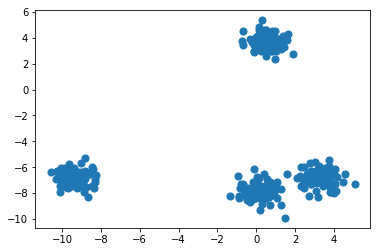

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

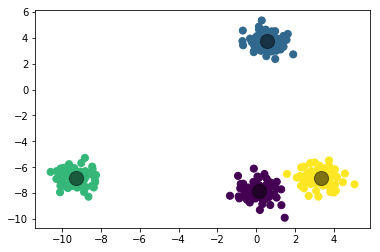

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

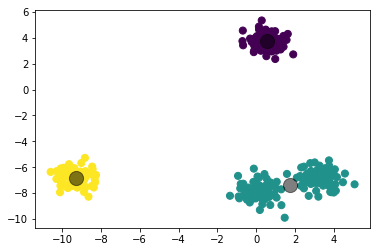

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Examples

- Iris: Classify flower species based on measurements
- Handwritten Digits: Is the digit a 0, 1, 2, 3, ... ?

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

In [18]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [19]:
import pandas as pd
X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target

In [20]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
y[:15], y[70:90]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

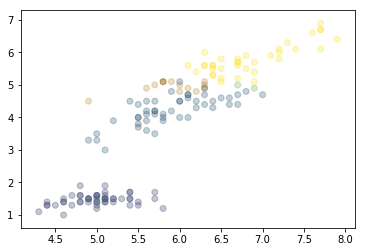

In [22]:
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c = y, alpha = 0.2)
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c = y_kmeans, alpha = 0.1)

### Digit Recognition

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [24]:
a = digits.data[0].reshape(8, 8)

In [26]:
a

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

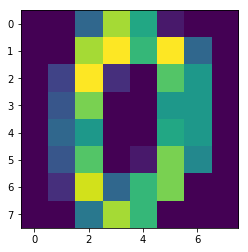

In [27]:
plt.imshow(a)

In [28]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

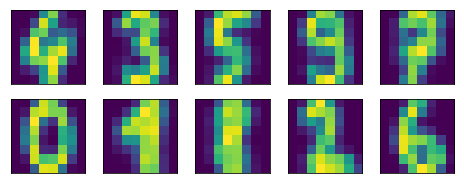

In [111]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest')

### Problem 

Use kmeans to cluster the following song data.  Discuss the meaning of the clusters. 

In [29]:
import pandas as pd
songs = pd.read_csv('data/songs.csv')

In [30]:
songs.head()

,name,party rhymes,folk influences,indian influences,use of ambient synths,sexist lyrics,catchy hooks,Puerto Rican roots,a knack for catchy hooks,subtle use of white noise,...,smooth synth textures,use of techno synths,ska influences,prominent drums,cash obsessed lyrics,surreal lyrics,rhythmic clapping,jazz influences,arpeggiated synths,varying tempo and time signatures
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,/angels-airwaves/everythings-magic/everythings...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,/angels-airwaves/i-empire/call-to-arms,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,/angels-airwaves/i-empire/secret-crowds,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,/angels-airwaves/warped-tour-2008-compilation/...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Columns: 314 entries, name to varying tempo and time signatures
dtypes: bool(313), object(1)
memory usage: 73.7+ KB


In [ ]:
sg = KMeans()
sg.fit()

### KMeans and Regression

We can use the KMeans approach to consider our earlier problem involving finding the line of best fit for the `mtcars` dataset.  Now, we want to assign $y$-values based on the nearest $k$ neighbors.  Plotting the result of two iterations with different values for $k$ surfaces important considerations.

In [32]:
mtcars = pd.read_csv('data/mtcars.csv')

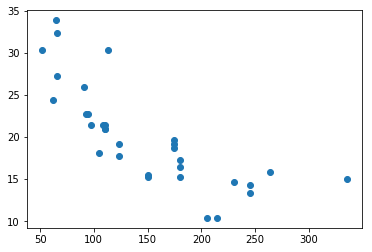

In [33]:
plt.scatter(mtcars['hp'], mtcars['mpg'])

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
regress = KNeighborsRegressor()
X = mtcars['hp'].values.reshape(-1,1)
y = mtcars['mpg']

regress2 = KNeighborsRegressor(n_neighbors=20)

In [36]:
regress.fit(X, y)
regress2.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='uniform')

In [37]:
x = mtcars.sort_values('hp')
y2 = regress.predict(x['hp'].values.reshape(-1,1))
y3 = regress2.predict(x['hp'].values.reshape(-1,1))

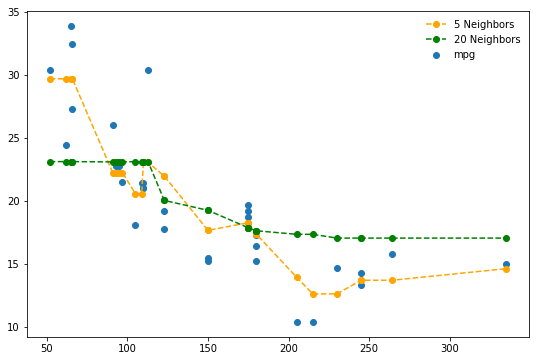

In [38]:
plt.figure(figsize = (9, 6))
plt.scatter(mtcars['hp'], mtcars['mpg']);
plt.plot(x['hp'], y2, '--o', color = 'orange', label = '5 Neighbors');
plt.plot(x['hp'], y3, '--o', color = 'green', label = '20 Neighbors');
plt.legend(frameon = False)